# Electricity data analysis

In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def load_csv(data_path):    
    # Load CSV file
    df = pd.read_csv(data_path)
    df['date_time'] = pd.to_datetime(df['date'] + ' ' + df['beat_start_time'], dayfirst=True)
    return df

def process_data(df):
    original_consumption = 'consumption_kWh'
    date_time_column = 'date_time'
    
    # Calculate Const discounted usage (7% discount)
    const_discount = 7
    const_discount_consumption = 'const_discount_consumption_kWh'
    df[const_discount_consumption] = df[original_consumption] * (100-const_discount)/100  # Applying discount

    # Apply discount of 18% for usage between 14:00 and 20:00
    peak_hours_discount = 18
    peak_hours_discount_consumption = 'peak_hours_discount_consumption_kWh' 
    df[peak_hours_discount_consumption] = df[original_consumption]
    mask = (df[date_time_column].dt.hour >= 14) & (df[date_time_column].dt.hour < 20)
    df.loc[mask, peak_hours_discount_consumption] *= (100-peak_hours_discount)/100  # Applying discount

    # Apply discount of 20% for usage between 23:00 and 07:00
    night_hours_discount = 20
    night_hours_discount_consumption = 'night_hours_discount_consumption_kWh'
    df[night_hours_discount_consumption] = df[original_consumption]
    mask = (df[date_time_column].dt.hour >= 23) | (df[date_time_column].dt.hour < 7)
    df.loc[mask, night_hours_discount_consumption] *= (100-night_hours_discount)/100  # Applying discount

    # Apply discount of 15% for usage between 07:00 and 17:00
    work_hours_discount = 15
    work_hours_discount_consumption = 'work_hours_discount_consumption_kWh' 
    df[work_hours_discount_consumption] = df[original_consumption]
    mask = (df[date_time_column].dt.hour >= 7) \
            & (df[date_time_column].dt.hour < 17) \
            & (df[date_time_column].dt.dayofweek >= 0) \
            & (df[date_time_column].dt.dayofweek <= 4)
    df.loc[mask, work_hours_discount_consumption] *= (100-work_hours_discount)/100  # Applying discount

    # Extract month and year from the date_time_column column
    df['year_month'] = df[date_time_column].dt.to_period('M')
    
    display(df[[
        original_consumption, 
        const_discount_consumption, 
        peak_hours_discount_consumption, 
        work_hours_discount_consumption, 
        night_hours_discount_consumption
        ]].sum().sort_values())

    # Aggregate usage by month
    monthly_usage = df.groupby('year_month')\
        [[
            original_consumption, 
            const_discount_consumption, 
            peak_hours_discount_consumption, 
            work_hours_discount_consumption, 
            night_hours_discount_consumption
        ]].sum().reset_index()

    # print(monthly_usage)

    # Convert 'year_month' back to datetime for plotting
    monthly_usage['year_month'] = monthly_usage['year_month'].dt.to_timestamp()

    return monthly_usage

def show_plot(melted_df):
    # Plotting the line plot with markers
    plt.figure(figsize=(12, 6))

    sns.lineplot(data=melted_df, x='year_month', y='Usage', hue='Consumption_Type', marker='o')

    # Customize the plot
    plt.title('Monthly Usage')
    plt.xlabel('Month')
    plt.ylabel('Usage')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

def show_barplot(melted_df):
    # Plot the data using Seaborn
    plt.figure(figsize=(12, 6))
    
    # Plotting the bar plot
    sns.barplot(data=melted_df, x='year_month', y='Usage', hue='Consumption_Type')

    # Customize the plot
    plt.title('Monthly Usage')
    plt.xlabel('Month')
    plt.ylabel('Usage')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()


## Show Usage Per Month

const_discount_consumption_kWh          5584.71138
peak_hours_discount_consumption_kWh     5627.08652
night_hours_discount_consumption_kWh    5676.43380
work_hours_discount_consumption_kWh     5770.23935
consumption_kWh                         6005.06600
dtype: float64

,year_month,consumption_kWh,const_discount_consumption_kWh,peak_hours_discount_consumption_kWh,work_hours_discount_consumption_kWh,night_hours_discount_consumption_kWh
0,2023-12-01,267.155,248.45415,246.15224,257.04305,256.8024
1,2024-01-01,658.186,612.11298,611.78272,624.88240,634.9406
2,2024-02-01,621.605,578.09265,576.18848,594.14330,598.5590
3,2024-03-01,566.895,527.21235,533.14626,546.53475,543.0878
4,2024-04-01,835.688,777.18984,780.86288,801.53060,791.6348
5,2024-05-01,844.345,785.24085,795.32506,811.90960,792.9290
6,2024-06-01,1397.124,1299.32532,1319.10300,1349.65455,1301.4440
7,2024-07-01,814.068,757.08324,764.52588,784.54110,757.0362


,Consumption_Type,Usage
year_month,,
2024-07-01,night_hours_discount_consumption_kWh,757.03620
2024-07-01,const_discount_consumption_kWh,757.08324
2024-07-01,peak_hours_discount_consumption_kWh,764.52588
2024-07-01,work_hours_discount_consumption_kWh,784.54110
2024-07-01,consumption_kWh,814.06800
2024-06-01,const_discount_consumption_kWh,1299.32532
2024-06-01,night_hours_discount_consumption_kWh,1301.44400
2024-06-01,peak_hours_discount_consumption_kWh,1319.10300
2024-06-01,work_hours_discount_consumption_kWh,1349.65455


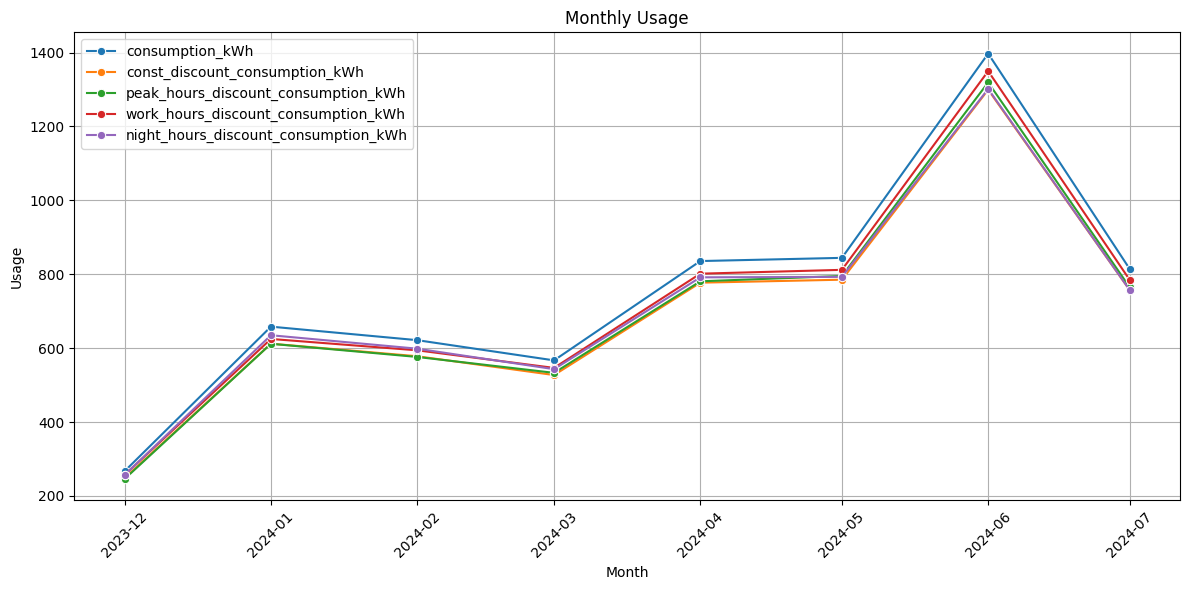

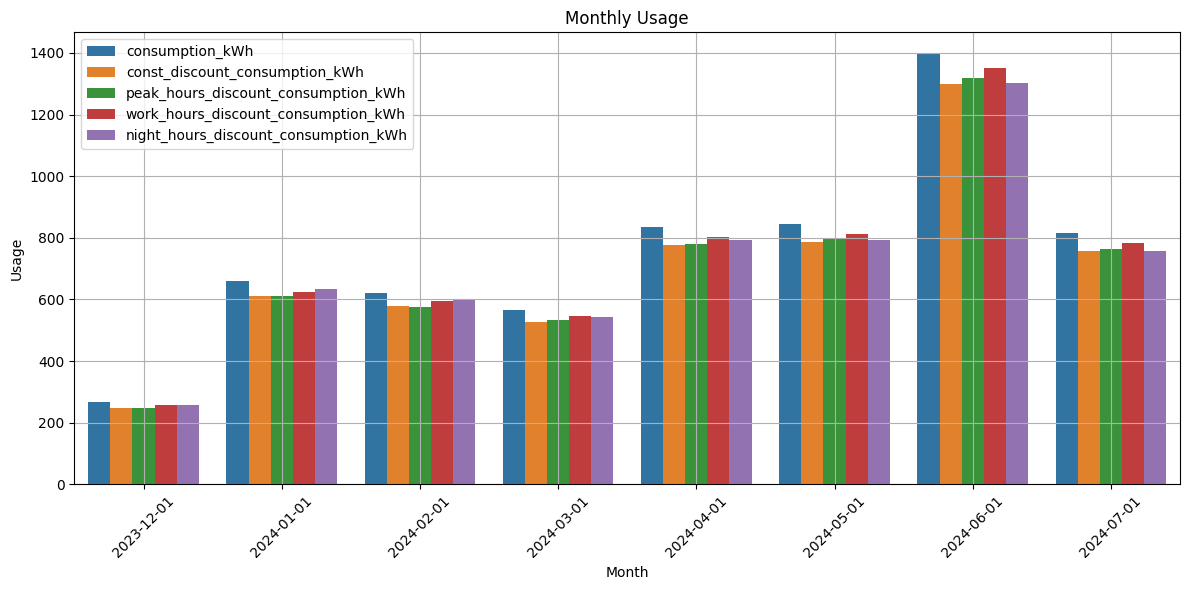

In [110]:
import os

data_folder_path = '/Users/yoavhagashi/Project/Electricity_reform/data'
file_name = 'meter_23209887_LP_18-07-2024.csv'    

data_path = os.path.join(data_folder_path, file_name)
# Load CSV file
df = load_csv(data_path)
monthly_usage = process_data(df)

# Melt the DataFrame for easier plotting with seaborn
melted_df = monthly_usage.melt(id_vars='year_month', var_name='Consumption_Type', value_name='Usage')

display(monthly_usage)
display(melted_df.sort_values(by=['year_month', 'Usage'], ascending=[False, True]).set_index('year_month'))
show_plot(melted_df)
show_barplot(melted_df)
